In [16]:
# imports
import cdflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timezone

# File Analysis

In [ ]:
# Analyzing bulk file

blk_cdf = cdflib.CDF("../dataset/AL1_ASW91_L2_BLK_20250103_UNP_9999_999999_V02.cdf")

# Get CDF info
blk_info = blk_cdf.cdf_info()

# Access variable names using attributes (not dictionary keys)
print("Variables in Bulk file:")
print("zVariables:", blk_info.zVariables)
print("rVariables:", blk_info.rVariables)

Variables in Bulk file:
zVariables: ['epoch_for_cdf_mod', 'proton_density', 'numden_p_uncer', 'proton_bulk_speed', 'bulk_p_uncer', 'proton_xvelocity', 'proton_yvelocity', 'proton_zvelocity', 'proton_thermal', 'thermal_p_uncer', 'alpha_density', 'numden_a_uncer', 'alpha_bulk_speed', 'bulk_a_uncer', 'alpha_thermal', 'thermal_a_uncer', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos']
rVariables: []


In [18]:
# Dynamically add each attribute as a separate column for each variable
attributes_list = [blk_cdf.varattsget(var) for var in blk_info.zVariables]
all_attr_keys = set()
for attrs in attributes_list:
    all_attr_keys.update(attrs.keys())

blk_variables_df = pd.DataFrame({"Variable": blk_info.zVariables})
for key in all_attr_keys:
    # To access or print the attributes for each variable:
    print(f"\nAttribute: {key}")
    for var, attrs in zip(blk_info.zVariables, attributes_list):
        print(f"  {var}: {attrs.get(key, None)} \n")
    # Add as column to DataFrame
    blk_variables_df[key] = [attrs.get(key, None) for attrs in attributes_list]
    



Attribute: SCALETYP
  epoch_for_cdf_mod: linear 

  proton_density: linear 

  numden_p_uncer: None 

  proton_bulk_speed: linear 

  bulk_p_uncer: None 

  proton_xvelocity: linear 

  proton_yvelocity: linear 

  proton_zvelocity: linear 

  proton_thermal: linear 

  thermal_p_uncer: None 

  alpha_density: linear 

  numden_a_uncer: None 

  alpha_bulk_speed: linear 

  bulk_a_uncer: None 

  alpha_thermal: linear 

  thermal_a_uncer: None 

  spacecraft_xpos: linear 

  spacecraft_ypos: linear 

  spacecraft_zpos: linear 


Attribute: MONOTON
  epoch_for_cdf_mod: INCREASE 

  proton_density: None 

  numden_p_uncer: None 

  proton_bulk_speed: None 

  bulk_p_uncer: None 

  proton_xvelocity: None 

  proton_yvelocity: None 

  proton_zvelocity: None 

  proton_thermal: None 

  thermal_p_uncer: None 

  alpha_density: None 

  numden_a_uncer: None 

  alpha_bulk_speed: None 

  bulk_a_uncer: None 

  alpha_thermal: None 

  thermal_a_uncer: None 

  spacecraft_xpos: None 

  spa

In [19]:
# Getting detailed information about variables from bulk file

print("Detailed Variable Information of blk file:")
print("=" * 50)

for var in blk_info.zVariables:
    var_info = blk_cdf.varinq(var)
    print(f"\nVariable: {var}")
    print(f"  Data Type: {var_info.Data_Type_Description}")
    print(f"  Dimensions: {var_info.Dim_Sizes}")
    
    # Show all available attributes of var_info
    print(f"  Available info: {[attr for attr in dir(var_info) if not attr.startswith('_')]}")
    
    # Get the actual data to see its shape and content
    try:
        data = blk_cdf[var][:]
        print(f"  Data shape: {data.shape}")
        print(f"  Data type: {type(data)}")
        
        # Show first few values if it's a simple array
        if data.size <= 20:  # Small arrays - show all
            print(f"  Data: {data}")
        else:  # Large arrays - show sample
            print(f"  First 5 values: {data.flat[:5] if hasattr(data, 'flat') else 'N/A'}")
            
    except Exception as e:
        print(f"  Error reading data: {str(e)}")

Detailed Variable Information of blk file:

Variable: epoch_for_cdf_mod
  Data Type: CDF_EPOCH
  Dimensions: []
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17275,)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [6.39030816e+13 6.39030816e+13 6.39030816e+13 6.39030816e+13
 6.39030816e+13]

Variable: proton_density
  Data Type: CDF_DOUBLE
  Dimensions: []
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17275,)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [12.12578549 13.16558561 13.45022251 11.7010548  12.66298844]

Variable: numden_p_uncer
  Data Type: CDF_DOUBLE
  Dimensions: []
  Available info: ['Block_Factor', 'Co

In [ ]:
# Analyzing THA-1 file
# Top Hat Analyser-1 (THA-1): Designed for species differentiation (H+ and He++) in the ecliptic plane6.... 
# It uses an electrostatic energy analyzer (ESA) combined with a magnetic mass analyzer (MMA)1015.

tha1_cdf = cdflib.CDF("../dataset/AL1_ASW91_L2_TH1_20250615_UNP_9999_999999_V02.cdf")

# Get CDF info
tha1_info = tha1_cdf.cdf_info()

# Access variable names using attributes (not dictionary keys)
print("Variables in THA-1 file:")
print("zVariables:", tha1_info.zVariables)
print("rVariables:", tha1_info.rVariables)

Variables in THA-1 file:
zVariables: ['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s9_mod', 'integrated_flux_s10_mod', 'integrated_flux_s11_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha1']
rVariables: []


In [21]:
# Getting detailed information about variables from THA-1 file

print("Detailed Variable Information of THA-1 file:")
print("=" * 50)

for var in tha1_info.zVariables:
    var_info = tha1_cdf.varinq(var)
    print(f"\nVariable: {var}")
    print(f"  Data Type: {var_info.Data_Type_Description}")
    print(f"  Dimensions: {var_info.Dim_Sizes}")
    
    # Show all available attributes of var_info
    print(f"  Available info: {[attr for attr in dir(var_info) if not attr.startswith('_')]}")
    
    # Get the actual data to see its shape and content
    try:
        data = tha1_cdf[var][:]
        print(f"  Data shape: {data.shape}")
        print(f"  Data type: {type(data)}")
        
        # Show first few values if it's a simple array
        if data.size <= 20:  # Small arrays - show all
            print(f"  Data: {data}")
        else:  # Large arrays - show sample
            print(f"  First 5 values: {data.flat[:5] if hasattr(data, 'flat') else 'N/A'}")
            
    except Exception as e:
        print(f"  Error reading data: {str(e)}")

Detailed Variable Information of THA-1 file:

Variable: epoch_for_cdf_mod
  Data Type: CDF_EPOCH
  Dimensions: []
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17194,)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [6.39171648e+13 6.39171648e+13 6.39171648e+13 6.39171648e+13
 6.39171649e+13]

Variable: energy_center_mod
  Data Type: CDF_DOUBLE
  Dimensions: [50]
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17194, 50)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [125.93289039 136.69067051 147.44845064 168.96401088 179.72179101]

Variable: energy_uncer
  Data Type: CDF_DOUBLE
  Dimensions: []
  Available info: ['Block

In [ ]:
# Analyzing THA-2 file
# Measures the total flux (species integrated mode) across the ecliptic plane6.... It uses an ESA but does not contain an MMA

tha2_cdf = cdflib.CDF("../dataset/AL1_ASW91_L2_TH2_20250615_UNP_9999_999999_V02.cdf")

# Get CDF info
tha2_info = tha2_cdf.cdf_info()

# Access variable names using attributes (not dictionary keys)
print("Variables in THA-2 file:")
print("zVariables:", tha2_info.zVariables)
print("rVariables:", tha2_info.rVariables)

Variables in THA-2 file:
zVariables: ['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s15_mod', 'integrated_flux_s16_mod', 'integrated_flux_s17_mod', 'integrated_flux_s18_mod', 'integrated_flux_s19_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha2']
rVariables: []


In [23]:
# Getting detailed information about variables from THA-2 file

print("Detailed Variable Information of THA-2 file:")
print("=" * 50)

for var in tha2_info.zVariables:
    var_info = tha2_cdf.varinq(var)
    print(f"\nVariable: {var}")
    print(f"  Data Type: {var_info.Data_Type_Description}")
    print(f"  Dimensions: {var_info.Dim_Sizes}")
    
    # Show all available attributes of var_info
    print(f"  Available info: {[attr for attr in dir(var_info) if not attr.startswith('_')]}")
    
    # Get the actual data to see its shape and content
    try:
        data = tha2_cdf[var][:]
        print(f"  Data shape: {data.shape}")
        print(f"  Data type: {type(data)}")
        
        # Show first few values if it's a simple array
        if data.size <= 20:  # Small arrays - show all
            print(f"  Data: {data}")
        else:  # Large arrays - show sample
            print(f"  First 5 values: {data.flat[:5] if hasattr(data, 'flat') else 'N/A'}")
            
    except Exception as e:
        print(f"  Error reading data: {str(e)}")

Detailed Variable Information of THA-2 file:

Variable: epoch_for_cdf_mod
  Data Type: CDF_EPOCH
  Dimensions: []
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17194,)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [6.39171648e+13 6.39171648e+13 6.39171648e+13 6.39171648e+13
 6.39171649e+13]

Variable: energy_center_mod
  Data Type: CDF_DOUBLE
  Dimensions: [50]
  Available info: ['Block_Factor', 'Compress', 'Data_Type', 'Data_Type_Description', 'Dim_Sizes', 'Dim_Vary', 'Last_Rec', 'Num', 'Num_Dims', 'Num_Elements', 'Pad', 'Rec_Vary', 'Sparse', 'Var_Type', 'Variable']
  Data shape: (17194, 50)
  Data type: <class 'numpy.ndarray'>
  First 5 values: [172.50130344 183.24450193 193.98770042 215.47409739 226.21729588]

Variable: energy_uncer
  Data Type: CDF_DOUBLE
  Dimensions: []
  Available info: ['Block

# Time series plots

### For blk file

In [24]:
# Extract blk variables
epoch = blk_cdf['epoch_for_cdf_mod'][:]
time = cdflib.cdfepoch.to_datetime(epoch)
proton_density = blk_cdf['proton_density'][:]
proton_speed = blk_cdf['proton_bulk_speed'][:]
alpha_density = blk_cdf['alpha_density'][:]

# Create DataFrame
df = pd.DataFrame({
    "UTC": time,
    "Proton_Density": proton_density,
    "Proton_Bulk_Speed": proton_speed,
    "Alpha_Density": alpha_density
})

FILLVAL = -1e31  # Use exact value from the file for robustness

# Mask invalid rows
df_clean = df[(df["Proton_Density"] != FILLVAL) &
              (df["Proton_Bulk_Speed"] != FILLVAL) &
              (df["Alpha_Density"] != FILLVAL)].copy()

df = df_clean
print("DataFrame after cleaning:")
print(df.head())

DataFrame after cleaning:
                      UTC  Proton_Density  Proton_Bulk_Speed  Alpha_Density
0 2025-01-03 00:00:28.509       12.125785         469.738777       0.315740
1 2025-01-03 00:00:33.509       13.165586         469.841768       0.312579
2 2025-01-03 00:00:38.509       13.450223         469.553813       0.311614
3 2025-01-03 00:00:43.509       11.701055         469.523449       0.309863
4 2025-01-03 00:00:48.509       12.662988         470.017247       0.351223


##### Plot Proton Density

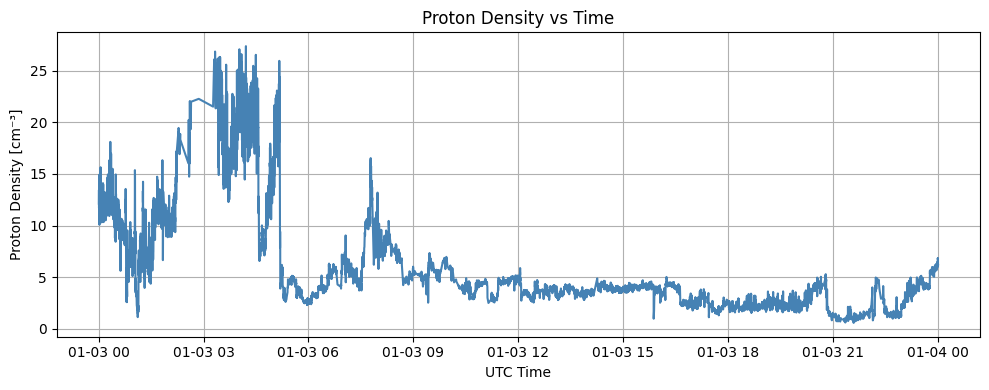

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(df["UTC"], df["Proton_Density"], color='steelblue')
plt.xlabel("UTC Time")
plt.ylabel("Proton Density [cm⁻³]")
plt.title("Proton Density vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Plot Proton Bulk Speed

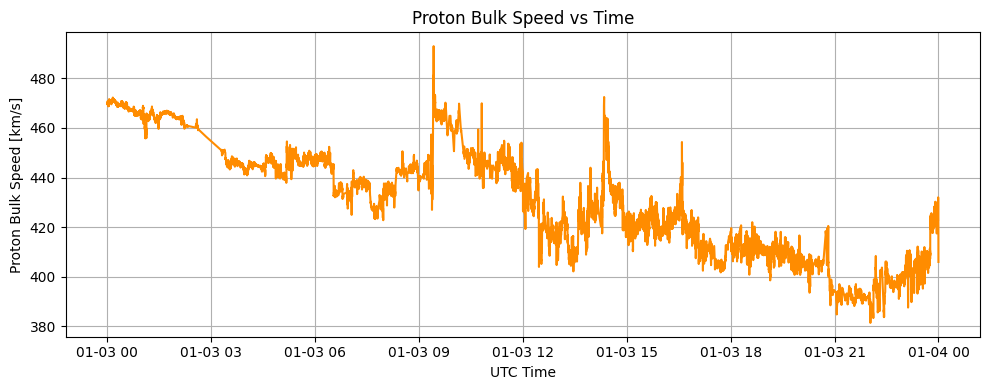

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(df["UTC"], df["Proton_Bulk_Speed"], color='darkorange')
plt.xlabel("UTC Time")
plt.ylabel("Proton Bulk Speed [km/s]")
plt.title("Proton Bulk Speed vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Plot Alpha Density

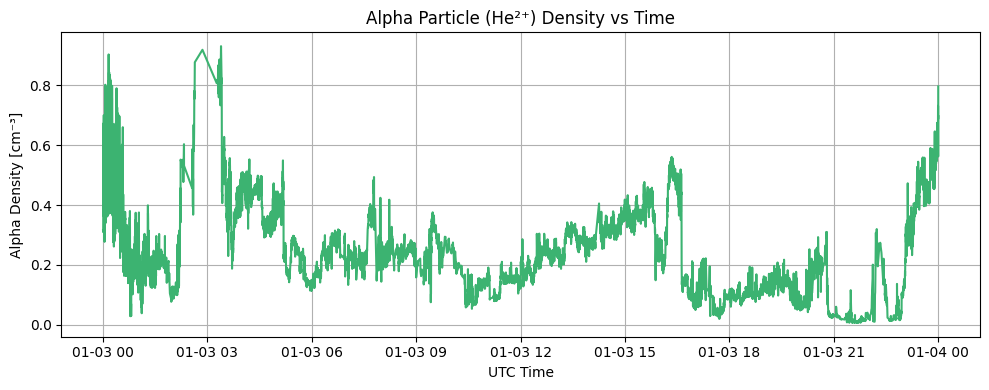

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(df["UTC"], df["Alpha_Density"], color='mediumseagreen')
plt.xlabel("UTC Time")
plt.ylabel("Alpha Density [cm⁻³]")
plt.title("Alpha Particle (He²⁺) Density vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()

##### Plot He²⁺ / H⁺ Ratio

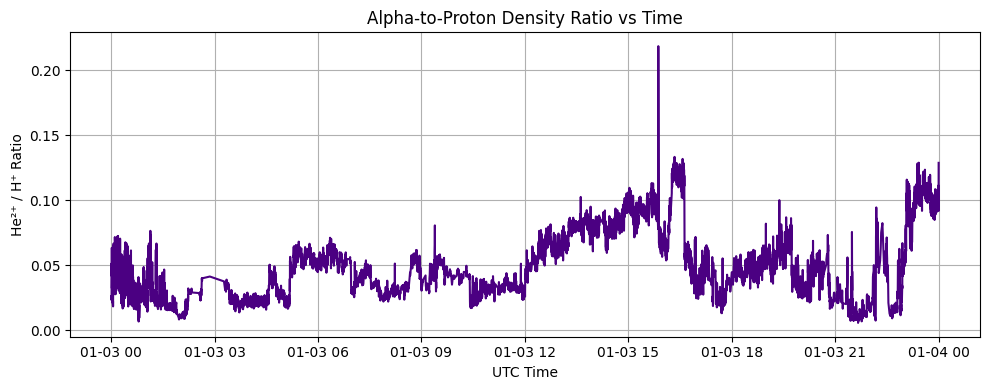

In [28]:
df["He2p_Hp_Ratio"] = df["Alpha_Density"] / df["Proton_Density"]

plt.figure(figsize=(10, 4))
plt.plot(df["UTC"], df["He2p_Hp_Ratio"], color='indigo')
plt.xlabel("UTC Time")
plt.ylabel("He²⁺ / H⁺ Ratio")
plt.title("Alpha-to-Proton Density Ratio vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()


### Combined:

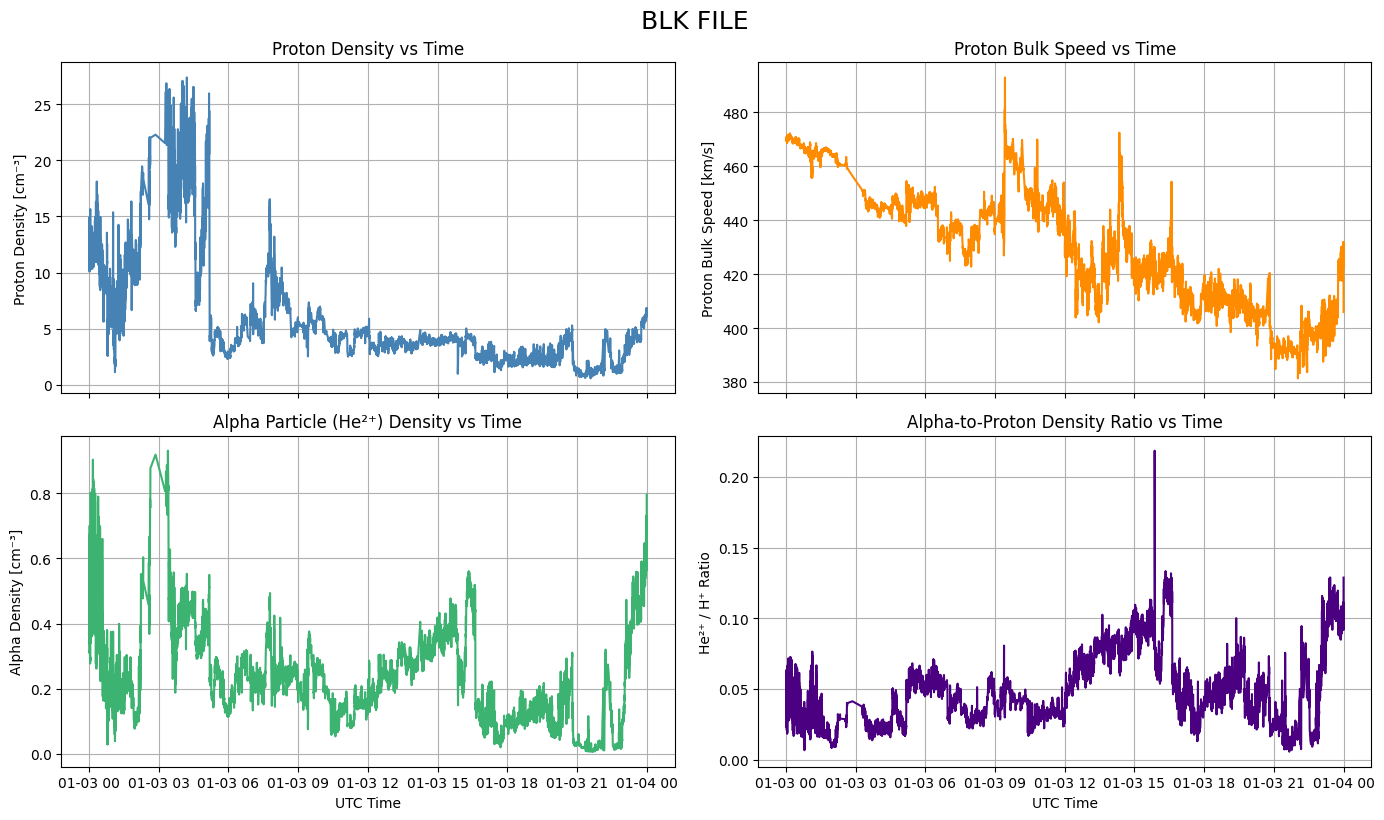

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

# Proton Density
axs[0, 0].plot(df["UTC"], df["Proton_Density"], color='steelblue')
axs[0, 0].set_ylabel("Proton Density [cm⁻³]")
axs[0, 0].set_title("Proton Density vs Time")
axs[0, 0].grid(True)

# Proton Bulk Speed
axs[0, 1].plot(df["UTC"], df["Proton_Bulk_Speed"], color='darkorange')
axs[0, 1].set_ylabel("Proton Bulk Speed [km/s]")
axs[0, 1].set_title("Proton Bulk Speed vs Time")
axs[0, 1].grid(True)

# Alpha Density
axs[1, 0].plot(df["UTC"], df["Alpha_Density"], color='mediumseagreen')
axs[1, 0].set_xlabel("UTC Time")
axs[1, 0].set_ylabel("Alpha Density [cm⁻³]")
axs[1, 0].set_title("Alpha Particle (He²⁺) Density vs Time")
axs[1, 0].grid(True)

# He²⁺ / H⁺ Ratio
axs[1, 1].plot(df["UTC"], df["He2p_Hp_Ratio"], color='indigo')
axs[1, 1].set_xlabel("UTC Time")
axs[1, 1].set_ylabel("He²⁺ / H⁺ Ratio")
axs[1, 1].set_title("Alpha-to-Proton Density Ratio vs Time")
axs[1, 1].grid(True)

plt.tight_layout()
plt.suptitle("BLK FILE", fontsize=18, y=1.02)
plt.show()

# HeatMap


Extracting data from Bulk file...
  ✓ Added BLK_epoch_for_cdf_mod
  ✓ Added BLK_proton_density
  ✓ Added BLK_numden_p_uncer
  ✓ Added BLK_proton_bulk_speed
  ✓ Added BLK_bulk_p_uncer
  ✓ Added BLK_proton_xvelocity
  ✓ Added BLK_proton_yvelocity
  ✓ Added BLK_proton_zvelocity
  ✓ Added BLK_proton_thermal
  ✓ Added BLK_thermal_p_uncer
  ✓ Added BLK_alpha_density
  ✓ Added BLK_numden_a_uncer
  ✓ Added BLK_alpha_bulk_speed
  ✓ Added BLK_bulk_a_uncer
  ✓ Added BLK_alpha_thermal
  ✓ Added BLK_thermal_a_uncer
  ✓ Added BLK_spacecraft_xpos
  ✓ Added BLK_spacecraft_ypos
  ✓ Added BLK_spacecraft_zpos

Extracting data from THA-1 file...
  ✓ Added THA1_epoch_for_cdf_mod
  ✓ Added THA1_energy_center_mod
  ✗ Error extracting energy_uncer from THA-1: invalid index to scalar variable.
  ✓ Added THA1_integrated_flux_mod
  ✗ Error extracting flux_uncer from THA-1: invalid index to scalar variable.
  ✓ Added THA1_integrated_flux_s9_mod
  ✓ Added THA1_integrated_flux_s10_mod
  ✓ Added THA1_integrated_flux

d:\Code\Python Projects\isro_bah_2025\venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
d:\Code\Python Projects\isro_bah_2025\venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
d:\Code\Python Projects\isro_bah_2025\venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
d:\Code\Python Projects\isro_bah_2025\venv\Lib\site-packag

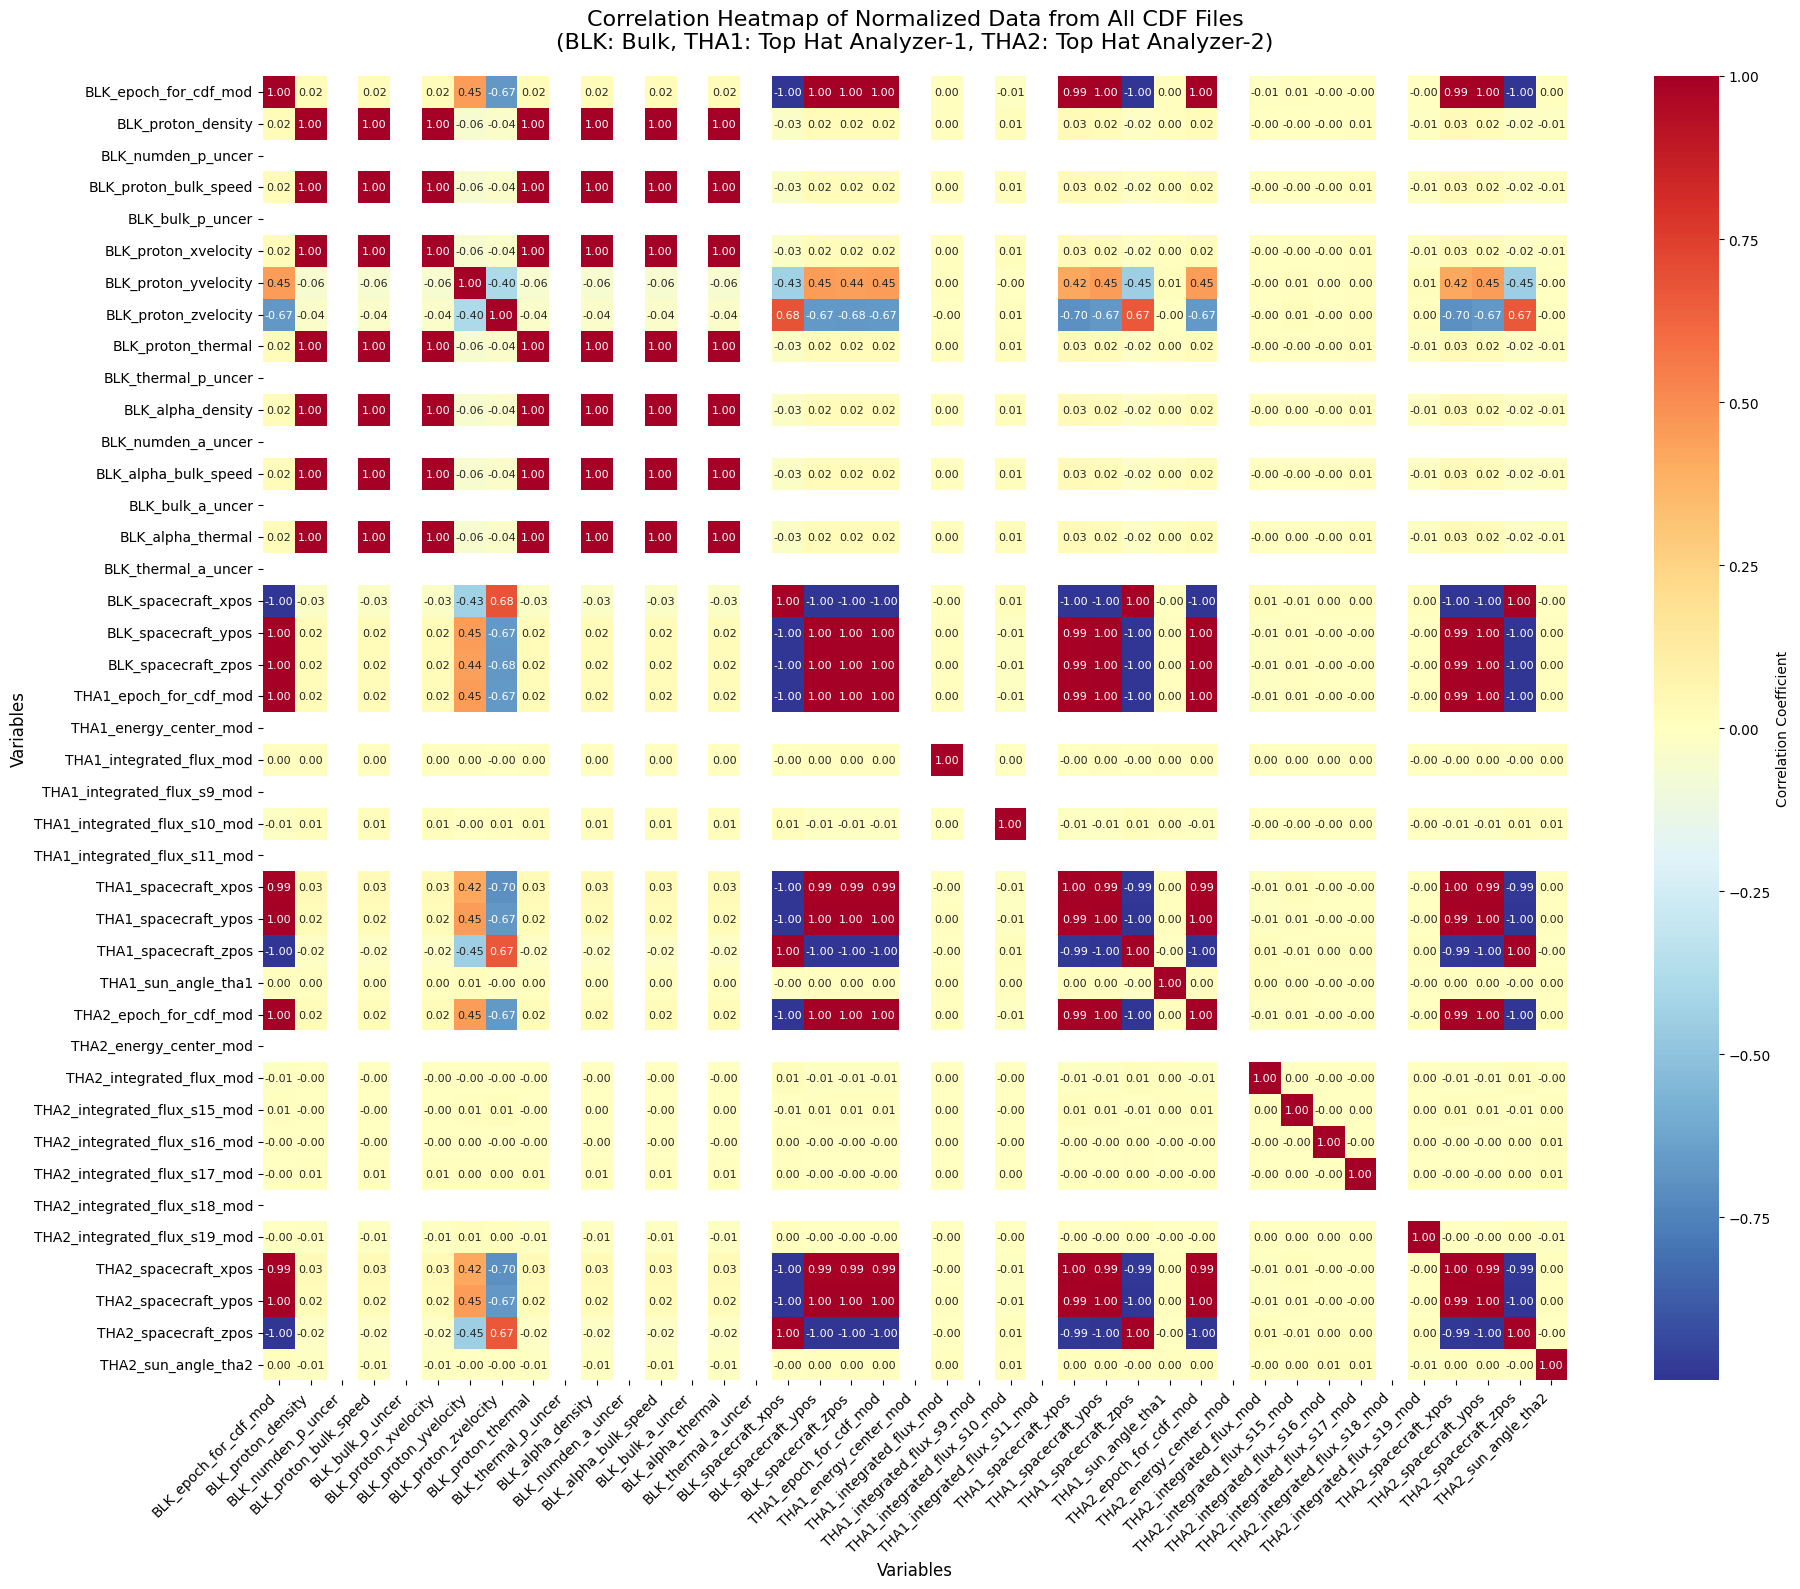


Summary of correlations:
Top 10 highest correlations:
 1. BLK_proton_density ↔ BLK_proton_bulk_speed: 1.000
 2. BLK_proton_density ↔ BLK_proton_xvelocity: 1.000
 3. BLK_proton_density ↔ BLK_proton_thermal: 1.000
 4. BLK_proton_density ↔ BLK_alpha_bulk_speed: 1.000
 5. BLK_proton_bulk_speed ↔ BLK_proton_xvelocity: 1.000
 6. BLK_proton_bulk_speed ↔ BLK_proton_thermal: 1.000
 7. BLK_proton_bulk_speed ↔ BLK_alpha_bulk_speed: 1.000
 8. BLK_proton_xvelocity ↔ BLK_proton_thermal: 1.000
 9. BLK_proton_xvelocity ↔ BLK_alpha_bulk_speed: 1.000
10. BLK_proton_thermal ↔ BLK_alpha_bulk_speed: 1.000

Total number of variable pairs analyzed: 435


In [30]:
# Create correlation heatmap with normalized data from all CDF files
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Initialize dictionary to store all data
all_data = {}

# Extract data from Bulk file (INCLUDING ALL VARIABLES)
print("Extracting data from Bulk file...")
for var in blk_info.zVariables:
    try:
        data = blk_cdf[var][:]
        # Handle multidimensional data by taking mean if needed
        if data.ndim > 1:
            data = np.mean(data, axis=tuple(range(1, data.ndim)))
        all_data[f'BLK_{var}'] = data.flatten()
        print(f"  ✓ Added BLK_{var}")
    except Exception as e:
        print(f"  ✗ Error extracting {var} from bulk: {e}")

# Extract data from THA-1 file (INCLUDING ALL VARIABLES)
print("\nExtracting data from THA-1 file...")
for var in tha1_info.zVariables:
    try:
        data = tha1_cdf[var][:]
        # Handle multidimensional data by taking mean if needed
        if data.ndim > 1:
            data = np.mean(data, axis=tuple(range(1, data.ndim)))
        all_data[f'THA1_{var}'] = data.flatten()
        print(f"  ✓ Added THA1_{var}")
    except Exception as e:
        print(f"  ✗ Error extracting {var} from THA-1: {e}")

# Extract data from THA-2 file (INCLUDING ALL VARIABLES)
print("\nExtracting data from THA-2 file...")
for var in tha2_info.zVariables:
    try:
        data = tha2_cdf[var][:]
        # Handle multidimensional data by taking mean if needed
        if data.ndim > 1:
            data = np.mean(data, axis=tuple(range(1, data.ndim)))
        all_data[f'THA2_{var}'] = data.flatten()
        print(f"  ✓ Added THA2_{var}")
    except Exception as e:
        print(f"  ✗ Error extracting {var} from THA-2: {e}")

# Find the minimum length across all variables to ensure consistent array sizes
min_length = min(len(data) for data in all_data.values())
print(f"\nMinimum data length: {min_length}")

# Truncate all arrays to the same length
for key in all_data:
    all_data[key] = all_data[key][:min_length]

# Create DataFrame
df = pd.DataFrame(all_data)
print(f"\nDataFrame created with shape: {df.shape}")
print(f"Initial columns: {list(df.columns)}")

# Check for problematic values before cleaning
print(f"\nData quality check:")
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_inf = df.columns[df.isin([np.inf, -np.inf]).any()].tolist()

print(f"Columns with NaN values: {columns_with_nan}")
print(f"Columns with infinite values: {columns_with_inf}")

# Handle problematic values with imputation instead of dropping columns
print(f"\nData cleaning strategy:")
print("- Replacing infinite values with NaN")
print("- Handling completely empty columns separately")
print("- Imputing NaN values with column median for partially filled columns")
print("- Keeping ALL columns including epoch_for_cdf_mod, integrated_flux_mod, energy_center_mod")

# Replace infinite values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Check for completely empty columns (all NaN)
completely_empty_cols = df.columns[df.isna().all()].tolist()
partially_empty_cols = df.columns[df.isna().any() & ~df.isna().all()].tolist()

print(f"Completely empty columns (all NaN): {completely_empty_cols}")
print(f"Partially empty columns (some NaN): {partially_empty_cols}")

# Handle completely empty columns by filling with zeros
for col in completely_empty_cols:
    df[col] = 0.0
    print(f"  - Filled {col} with zeros")

# For time variables (epoch_for_cdf_mod), use forward fill first, then median
time_columns = [col for col in df.columns if 'epoch_for_cdf_mod' in col]
for col in time_columns:
    if col in partially_empty_cols:
        df[col] = df[col].ffill().bfill()
        print(f"  - Forward/backward filled {col}")

# Apply median imputation to remaining columns with partial NaN values
remaining_nan_cols = df.columns[df.isna().any()].tolist()
if remaining_nan_cols:
    print(f"Applying median imputation to: {remaining_nan_cols}")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    
    # Apply imputation only to columns that still have NaN
    df[remaining_nan_cols] = imputer.fit_transform(df[remaining_nan_cols])

print(f"\nImputation results:")
print(f"Total columns: {len(df.columns)}")
print(f"Remaining NaN values: {df.isna().sum().sum()}")

# Verify all requested columns are present
requested_cols = ['epoch_for_cdf_mod', 'integrated_flux_mod', 'energy_center_mod']
present_cols = []
for req_col in requested_cols:
    matching_cols = [col for col in df.columns if req_col in col]
    present_cols.extend(matching_cols)

print(f"Requested columns now included: {present_cols}")
print(f"Final dataset shape: {df.shape}")
print(f"Variables included: {list(df.columns)}")

# Normalize the data using Z-score normalization
df_normalized = df.apply(zscore, nan_policy='omit')

# Calculate correlation matrix
correlation_matrix = df_normalized.corr()

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'size': 8})

plt.title('Correlation Heatmap of Normalized Data from All CDF Files\n(BLK: Bulk, THA1: Top Hat Analyzer-1, THA2: Top Hat Analyzer-2)', 
          fontsize=16, pad=20)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of correlations:")
print("=" * 50)

# Find highest correlations (excluding self-correlations)
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_val):
            correlation_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_val
            ))

# Sort by absolute correlation value
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("Top 10 highest correlations:")
for i, (var1, var2, corr) in enumerate(correlation_pairs[:10]):
    print(f"{i+1:2d}. {var1} ↔ {var2}: {corr:.3f}")

print(f"\nTotal number of variable pairs analyzed: {len(correlation_pairs)}")